# Extraction of International Financial Statistics data from the IMF using **imfdatapy**
The example below retrieves quarterly (period: Q) Seasonally Adjusted Real Gross Domestic Product (indicator: NGDP_R_SA_XDC) for the USA (country code: US), from the International Financial Statistics (IFS) series using the **imfdatapy** package. The function call returns the observation values, and the time period for each value (in the format YYYY-MM-DD).

First, we begin with loading the **imfdatapy** library for data extraction and from the IMF and **pandas** for data manipulation.

# imfdatapy package

Source code is available on [Github](https://github.com/Economic-and-Financial-Data-Discovery/imfdatapy).

The package can be installed using ```pip```.

In [1]:
!pip install imfdatapy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from imfdatapy.imf import *

In [3]:
import pandas as pd # for QoQ change calculation

To download the data from the International Financial Statistics, we use the ```IFS``` class, provding the search terms for the index we are looking for, the country code, the period frequency (Q) and the period. Use the ```download_data``` method to download the data and the metadata to '../out' folder and create a pandas dataframe. The log messages specify which files are created in the '../out' directory.

In [5]:
pd.options.display.max_colwidth = 90

In [6]:
ifs = IFS(search_terms=["gross domestic product"], countries=["US"], period='Q', start_date="2010",
                  end_date="2023")
df = ifs.download_data()
df

2022-12-01 00:10:26,551 imf.py:117 - INFO - Output all IMF series table to ../out/series_imf.csv
2022-12-01 00:10:26,569 imf.py:119 - INFO - Output series containing 'IFS' table to ../out/series_ifs.csv
2022-12-01 00:10:39,190 imf.py:249 - WARNING - Failed to download CL_FREQ.
2022-12-01 00:10:39,770 imf.py:132 - INFO - Output dimension CL_AREA_IFS table to ../out/dim_cl_area_ifs.csv
2022-12-01 00:10:39,784 imf.py:132 - INFO - Output dimension CL_INDICATOR_IFS table to ../out/dim_cl_indicator_ifs.csv
2022-12-01 00:10:40,153 imf.py:149 - INFO - Output meta data of IFS table to ../out/meta_ifs.csv
2022-12-01 00:10:40,172 imf.py:151 - INFO - Output meta data of IFS containing 'gross domestic product' table to ../out/meta_gross domestic product_US_Q_2010_2023.csv
2022-12-01 00:10:40,482 imf.py:171 - INFO - Output data of IFS containing 'gross domestic product' table to ../out/data_gross domestic product_US_Q_2010_2023.csv


,Description,Country,Period,Value,ID
0,"Gross Domestic Product, Deflator, Seasonally Adjusted, Index",US,2010-01-01,99.3392105021347,NGDP_D_SA_IX
1,"Gross Domestic Product, Deflator, Seasonally Adjusted, Index",US,2010-04-01,99.8236914454449,NGDP_D_SA_IX
2,"Gross Domestic Product, Deflator, Seasonally Adjusted, Index",US,2010-07-01,100.125182516395,NGDP_D_SA_IX
3,"Gross Domestic Product, Deflator, Seasonally Adjusted, Index",US,2010-10-01,100.711915536026,NGDP_D_SA_IX
4,"Gross Domestic Product, Deflator, Seasonally Adjusted, Index",US,2011-01-01,101.231913593634,NGDP_D_SA_IX
...,...,...,...,...,...
97,"Gross Domestic Product, Nominal, Seasonally Adjusted, Domestic Currency",US,2021-07-01,5887605,NGDP_SA_XDC
98,"Gross Domestic Product, Nominal, Seasonally Adjusted, Domestic Currency",US,2021-10-01,6087280.3,NGDP_SA_XDC
99,"Gross Domestic Product, Nominal, Seasonally Adjusted, Domestic Currency",US,2022-01-01,6185120,NGDP_SA_XDC
100,"Gross Domestic Product, Nominal, Seasonally Adjusted, Domestic Currency",US,2022-04-01,6312119,NGDP_SA_XDC


Here, all the data that matched the search term is loaded. To view the index names, use the meta data file as shown below.

In [7]:
meta = pd.read_csv('../out/meta_gross domestic product_US_Q_2010_2023.csv')

In [8]:
meta

,ID,Description.@xml:lang,Description
0,NGDP_D_IX,en,"Gross Domestic Product, Deflator, Index"
1,NGDP_D_SA_IX,en,"Gross Domestic Product, Deflator, Seasonally Adjusted, Index"
2,NGDP_XDC,en,"Gross Domestic Product, Nominal, Domestic Currency"
3,NGDP_SA_XDC,en,"Gross Domestic Product, Nominal, Seasonally Adjusted, Domestic Currency"
4,NGDP_NSA_XDC,en,"Gross Domestic Product, Nominal, Unadjusted, Domestic Currency"
5,NGDP_R_XDC,en,"Gross Domestic Product, Real, Domestic Currency"
6,NGDP_R_SA_XDC,en,"Gross Domestic Product, Real, Seasonally Adjusted, Domestic Currency"
7,NGDP_R_NSA_XDC,en,"Gross Domestic Product, Real, Unadjusted, Domestic Currency"


We are interested in 	Gross Domestic Product, Real, Seasonally Adjusted, Domestic Currency. We will filter the dataframe to contain only this index.

In [9]:
df = df[df['ID']=='NGDP_SA_XDC'].reset_index()


In [10]:
df.tail(n=5)

,index,Description,Country,Period,Value,ID
46,97,"Gross Domestic Product, Nominal, Seasonally Adjusted, Domestic Currency",US,2021-07-01,5887605,NGDP_SA_XDC
47,98,"Gross Domestic Product, Nominal, Seasonally Adjusted, Domestic Currency",US,2021-10-01,6087280.3,NGDP_SA_XDC
48,99,"Gross Domestic Product, Nominal, Seasonally Adjusted, Domestic Currency",US,2022-01-01,6185120,NGDP_SA_XDC
49,100,"Gross Domestic Product, Nominal, Seasonally Adjusted, Domestic Currency",US,2022-04-01,6312119,NGDP_SA_XDC
50,101,"Gross Domestic Product, Nominal, Seasonally Adjusted, Domestic Currency",US,2022-07-01,6415822.3,NGDP_SA_XDC


In [11]:
df['Value'] = pd.to_numeric(df['Value'])

In [12]:
df['QoQ'] = df['Value'].pct_change()

Now, we may plot the results using **matplotlib**.

In [13]:
import matplotlib.pyplot as plt

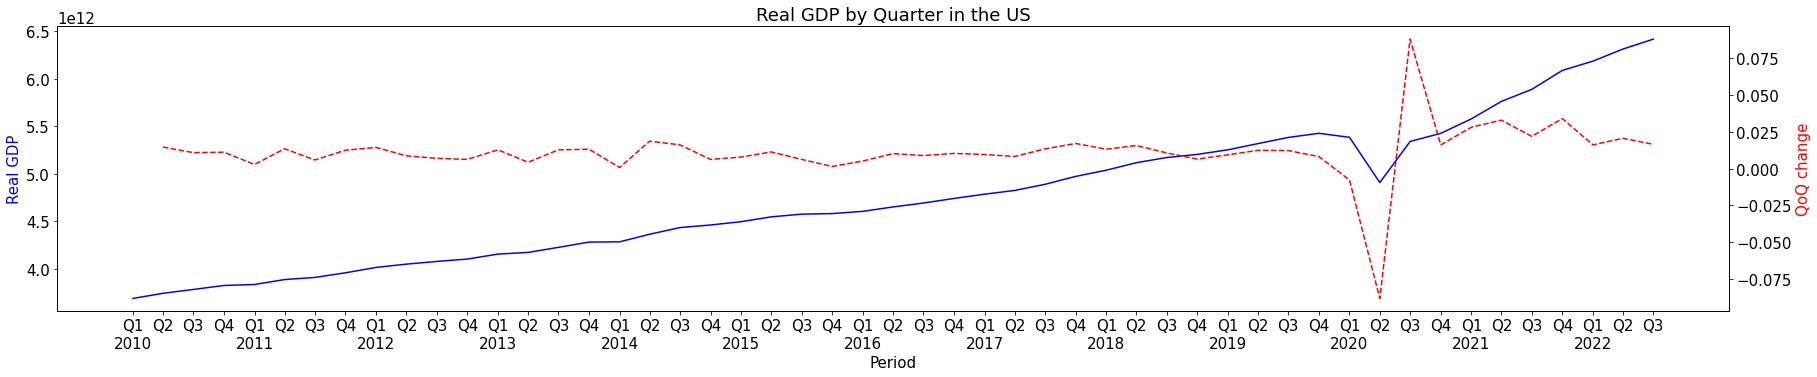

In [14]:
plt.rcParams.update({'font.size': 15})

t = df['Period']
data1 = df['Value'] * 10**6
data2 = df['QoQ']

labels = [f'Q{int(ts.month/3)+1}\n{ts.year}' if ts.month == 1
          else f'Q{int(ts.month/3)+1}' for ts in t]

fig, ax1 = plt.subplots()

ax1.set_xlabel('Period')
ax1.set_ylabel('Real GDP', color='blue')
ax1.set_xticks(t)
ax1.set_xticklabels(labels);
ax1.plot(t, data1, color='blue')
ax1.tick_params(axis='y', labelcolor='black')

ax2 = ax1.twinx()

ax2.set_ylabel('QoQ change', color='red')
ax2.set_xticks(t)
ax2.set_xticklabels(labels);
ax2.plot(t, data2, '--', color='red')
ax2.tick_params(axis='y', labelcolor='black')

fig.set_size_inches(25.5, 5.5)
plt.title('Real GDP by Quarter in the US')
fig.tight_layout()
plt.show()